import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_excel(r'C:\Users\amuly\Desktop\DATA ANALYSIS\OnlineRetail.xlsx')

In [64]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [65]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [66]:
print("INITIAL DATA CHECK")
print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())

INITIAL DATA CHECK
Dataset size: 541909 rows, 8 columns

Column names and types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [67]:
# Show all rows with missing CustomerID
missing_customers = df[df['CustomerID'].isna()]
print(f"Found {len(missing_customers)} rows with missing CustomerID:")
print(missing_customers.head(10))  # Show first 10

Found 135080 rows with missing CustomerID:
     InvoiceNo StockCode                          Description  Quantity  \
622     536414     22139                                  NaN        56   
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  

In [68]:
df_clean = df.copy()

In [69]:
print("STEP 1: HANDLE MISSING CUSTOMER IDs")
print(f"Missing CustomerIDs: {df_clean['CustomerID'].isnull().sum()}")

STEP 1: HANDLE MISSING CUSTOMER IDs
Missing CustomerIDs: 135080


In [70]:
def create_synthetic_id(row):
    if pd.isna(row['CustomerID']):
        # Create ID like: SYNTH_12345_UK
        return f"SYNTH_{row['InvoiceNo']}_{row['Country'][:2]}"
    else:
        return int(row['CustomerID'])

In [71]:
df_clean['CustomerID'] = df_clean.apply(create_synthetic_id, axis=1)
print(f"Created synthetic IDs for missing customers")
print(f"Total customers now: {df_clean['CustomerID'].nunique()}")

Created synthetic IDs for missing customers
Total customers now: 8082


In [72]:
print("STEP 2: CLEAN PRODUCT DESCRIPTIONS")
print(f"Missing descriptions: {df_clean['Description'].isnull().sum()}")

STEP 2: CLEAN PRODUCT DESCRIPTIONS
Missing descriptions: 1454


In [58]:
df_clean = df_clean.dropna(subset=['Description'])
print(f"After removing missing descriptions: {df_clean.shape[0]} rows remaining")

After removing missing descriptions: 540455 rows remaining


In [73]:
df_clean['Description'] = df_clean['Description'].str.upper().str.strip()

In [74]:
print("STEP 5: CHECK DATES")
print(f"Date range: {df_clean['InvoiceDate'].min()} to {df_clean['InvoiceDate'].max()}")
print(f"Missing dates: {df_clean['InvoiceDate'].isnull().sum()}")

STEP 5: CHECK DATES
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Missing dates: 0


In [75]:
print("STEP 6: CHECK COUNTRIES")
print("Top 5 countries:")
print(df_clean['Country'].value_counts().head())

STEP 6: CHECK COUNTRIES
Top 5 countries:
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64


In [76]:
print("STEP 7: CREATE USEFUL COLUMNS")

# Add total amount per transaction
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Add date components for analysis
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month

print("New columns created:")
print("- TotalAmount: Quantity × UnitPrice")
print("- Year and Month: For time-based analysis")


STEP 7: CREATE USEFUL COLUMNS
New columns created:
- TotalAmount: Quantity × UnitPrice
- Year and Month: For time-based analysis


In [77]:
print("STEP 8: CREATE CUSTOMER SUMMARY")

# Create customer-level data for segmentation
customer_data = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',           # Number of orders
    'Quantity': 'sum',                # Total items bought
    'TotalAmount': 'sum',             # Total money spent
    'InvoiceDate': ['min', 'max']     # First and last purchase dates
}).round(2)

STEP 8: CREATE CUSTOMER SUMMARY


In [78]:
customer_data.columns = ['Orders', 'Items', 'Revenue', 'FirstPurchase', 'LastPurchase']

In [79]:
customer_data['AvgOrderValue'] = (customer_data['Revenue'] / customer_data['Orders']).round(2)

In [80]:
customer_data['DaysBetweenPurchases'] = (
    customer_data['LastPurchase'] - customer_data['FirstPurchase']
).dt.days

In [81]:
print(f"Customer summary created with {len(customer_data)} customers")
print("\n Customer data preview:")
print(customer_data.head())

Customer summary created with 8082 customers

 Customer data preview:
            Orders  Items  Revenue       FirstPurchase        LastPurchase  \
CustomerID                                                                   
12346            2      0     0.00 2011-01-18 10:01:00 2011-01-18 10:17:00   
12347            7   2458  4310.00 2010-12-07 14:57:00 2011-12-07 15:52:00   
12348            4   2341  1797.24 2010-12-16 19:09:00 2011-09-25 13:13:00   
12349            1    631  1757.55 2011-11-21 09:51:00 2011-11-21 09:51:00   
12350            1    197   334.40 2011-02-02 16:01:00 2011-02-02 16:01:00   

            AvgOrderValue  DaysBetweenPurchases  
CustomerID                                       
12346                0.00                     0  
12347              615.71                   365  
12348              449.31                   282  
12349             1757.55                     0  
12350              334.40                     0  


In [82]:
print("FINAL RESULTS")
print(f"Original dataset: {df.shape[0]:,} rows")
print(f"Cleaned dataset: {df_clean.shape[0]:,} rows")
print(f"Data removed: {df.shape[0] - df_clean.shape[0]:,} rows ({((df.shape[0] - df_clean.shape[0])/df.shape[0]*100):.1f}%)")
print(f"Unique customers: {len(customer_data):,}")
print(f"Total revenue: £{df_clean['TotalAmount'].sum():,.2f}")
print(f"Date range: {df_clean['InvoiceDate'].min().strftime('%Y-%m-%d')} to {df_clean['InvoiceDate'].max().strftime('%Y-%m-%d')}")

FINAL RESULTS
Original dataset: 541,909 rows
Cleaned dataset: 541,909 rows
Data removed: 0 rows (0.0%)
Unique customers: 8,082
Total revenue: £9,747,747.93
Date range: 2010-12-01 to 2011-12-09


In [83]:
# Save the cleaned data
df_clean.to_csv('cleaned_retail_data.csv', index=False)
customer_data.to_csv('customer_summary.csv')

print(f"Files saved:")
print(f"- cleaned_retail_data.csv (transaction level)")
print(f"- customer_summary.csv (customer level)")

Files saved:
- cleaned_retail_data.csv (transaction level)
- customer_summary.csv (customer level)


RFM

In [84]:
df = pd.read_csv('cleaned_retail_data.csv', low_memory=False)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(f" Loaded data: {len(df):,} transactions")

 Loaded data: 541,909 transactions


In [85]:
print("STEP 1: Calculate RFM values")

# Find the latest date in data
latest_date = df['InvoiceDate'].max()
print(f"Latest purchase date: {latest_date.date()}")

STEP 1: Calculate RFM values
Latest purchase date: 2011-12-09


In [86]:
# Create RFM table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # How many days ago was last purchase?
    'InvoiceNo': 'count',                                   # How many purchases total?
    'TotalAmount': 'sum'                                    # How much money spent total?
})

In [87]:
# Give simple names
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

print(f"Created RFM data for {len(rfm):,} customers")
print("\nWhat each column means:")
print("- Recency: Days since last purchase (lower = better)")
print("- Frequency: Total number of purchases (higher = better)")
print("- Monetary: Total money spent (higher = better)")

print("\nFirst 5 customers:")
print(rfm.head())

Created RFM data for 8,082 customers

What each column means:
- Recency: Days since last purchase (lower = better)
- Frequency: Total number of purchases (higher = better)
- Monetary: Total money spent (higher = better)

First 5 customers:
  CustomerID  Recency  Frequency  Monetary
0      12346      325          2      0.00
1      12347        1        182   4310.00
2      12348       74         31   1797.24
3      12349       18         73   1757.55
4      12350      309         17    334.40


In [88]:
# STEP 2: Create simple scores (1, 2, 3)
print("STEP 2: Create simple scores (1-3)")

# Divide customers into 3 groups for each metric
# For Recency: 1=Recent, 2=Medium, 3=Old
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=3, labels=[3, 2, 1])

# For Frequency: 1=Low, 2=Medium, 3=High  
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=3, labels=[1, 2, 3])

# For Monetary: 1=Low, 2=Medium, 3=High
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=3, labels=[1, 2, 3])

STEP 2: Create simple scores (1-3)


In [89]:
print("\n DEBUGGING: Score distributions")
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int) 
rfm['M_Score'] = rfm['M_Score'].astype(int)
print("R_Score:", rfm['R_Score'].value_counts().sort_index())
print("F_Score:", rfm['F_Score'].value_counts().sort_index())
print("M_Score:", rfm['M_Score'].value_counts().sort_index())

# Check if any customers meet the "Best Customer" criteria
potential_best = rfm[(rfm['R_Score'] == 3) & (rfm['F_Score'] == 3) & (rfm['M_Score'] == 3)]
print(f" Customers with all 3s (potential Champions): {len(potential_best)}")


 DEBUGGING: Score distributions
R_Score: R_Score
1    2683
2    2705
3    2694
Name: count, dtype: int64
F_Score: F_Score
1    2694
2    2694
3    2694
Name: count, dtype: int64
M_Score: M_Score
1    2694
2    2694
3    2694
Name: count, dtype: int64
 Customers with all 3s (potential Champions): 1312


Machine Learning Customer Segmentation

In [90]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

STEP 2B: FINDING OPTIMAL NUMBER OF CLUSTERS
Method 1: Elbow Method (Within-Cluster Sum of Squares)
K=2: WCSS=7511.17, Silhouette Score=0.475
K=3: WCSS=4968.63, Silhouette Score=0.483
K=4: WCSS=3714.92, Silhouette Score=0.532
K=5: WCSS=2707.31, Silhouette Score=0.580
K=6: WCSS=1988.89, Silhouette Score=0.630
K=7: WCSS=1639.18, Silhouette Score=0.674
K=8: WCSS=1344.18, Silhouette Score=0.723
K=9: WCSS=1072.41, Silhouette Score=0.758
K=10: WCSS=900.01, Silhouette Score=0.791


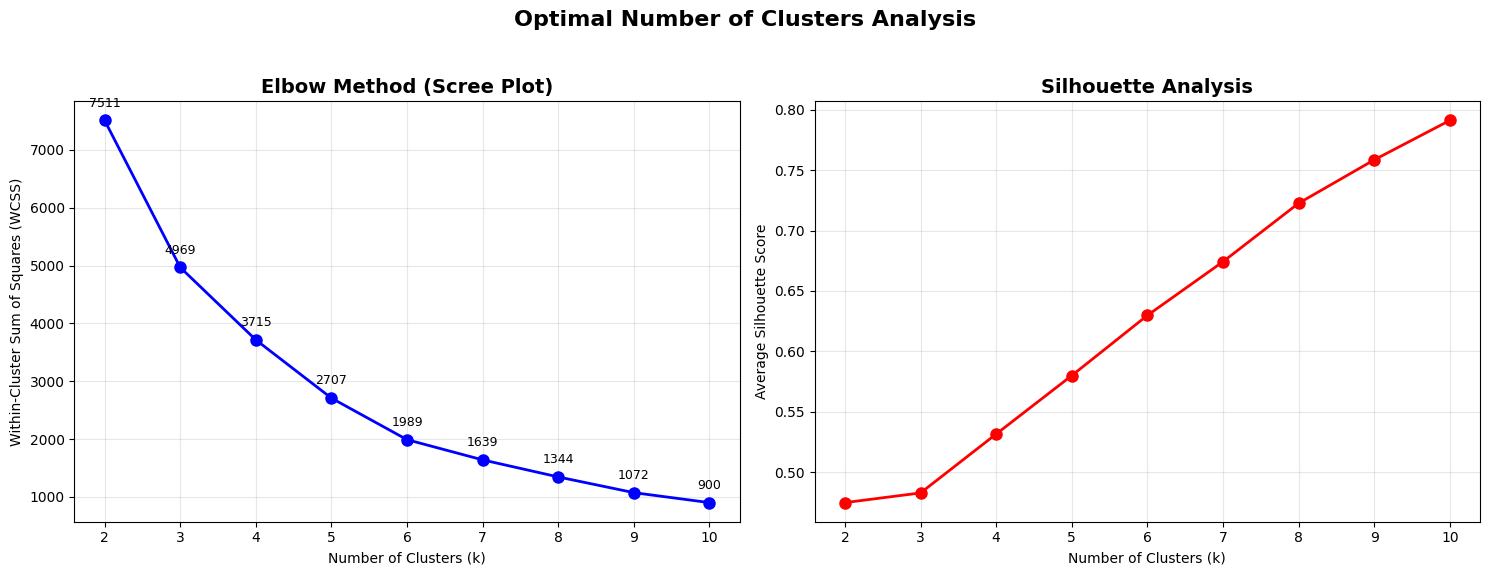


Method 2: Automatic Elbow Detection
Automatic Elbow Detection suggests: k = 2
Highest Silhouette Score suggests: k = 10

Method 3: Business Logic Recommendation
k=3: Good for simple segmentation (High/Medium/Low value) (Silhouette: 0.483)
k=4: Balanced approach for marketing campaigns (Silhouette: 0.532)
k=5: Detailed segmentation for personalized strategies (Silhouette: 0.580)
k=6: Very detailed but may be too complex (Silhouette: 0.630)
k=7: Risk of over-segmentation (Silhouette: 0.674)

FINAL RECOMMENDATIONS:
Elbow Method suggests: k = 2
Silhouette Analysis suggests: k = 10
RECOMMENDED: k = 2
Reason: Good balance based on elbow method
Silhouette Score at k=2: 0.475

Now using k=2 for final clustering...

Optimal clustering complete with k=2!

Optimal ML Groups:
- Segment_2: 4437 customers (54.9%)
- Segment_1: 3645 customers (45.1%)

Characteristics of Optimal Clusters (k=2):
                  R_Score  F_Score  M_Score  Recency  Frequency  Monetary
ML_Group_Optimal                  

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("STEP 2B: FINDING OPTIMAL NUMBER OF CLUSTERS")

# Preparing the data for clustering 
ml_data = rfm[['R_Score', 'F_Score', 'M_Score']].copy()

# Method 1: Elbow Method (Scree Plot)
print("Method 1: Elbow Method (Within-Cluster Sum of Squares)")

k_range = range(2, 11)  # Test 2 to 10 clusters
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ml_data)
    
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(ml_data, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    print(f"K={k}: WCSS={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.3f}")

# Plotting (Only Scree Plot and Silhouette Score)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Optimal Number of Clusters Analysis', fontsize=16, fontweight='bold')

# Scree Plot
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_title('Elbow Method (Scree Plot)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.grid(True, alpha=0.3)
for k, inertia in zip(k_range, inertias):
    ax1.annotate(f'{inertia:.0f}', (k, inertia), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9)

# Silhouette Plot
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Average Silhouette Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Method 2: Automatic Elbow Detection
print("\nMethod 2: Automatic Elbow Detection")
rate_of_change = np.diff(inertias)
rate_of_rate_of_change = np.diff(rate_of_change)
elbow_point = np.argmax(rate_of_rate_of_change) + 2
optimal_k_elbow = k_range[elbow_point - 2]
print(f"Automatic Elbow Detection suggests: k = {optimal_k_elbow}")

# Method 3: Silhouette-based suggestion
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"Highest Silhouette Score suggests: k = {optimal_k_silhouette}")

# Business Logic
print("\nMethod 3: Business Logic Recommendation")
business_recommendations = {
    3: "Good for simple segmentation (High/Medium/Low value)",
    4: "Balanced approach for marketing campaigns", 
    5: "Detailed segmentation for personalized strategies",
    6: "Very detailed but may be too complex",
    7: "Risk of over-segmentation"
}
for k, desc in business_recommendations.items():
    if k in k_range:
        sil_score = silhouette_scores[k - 2]
        print(f"k={k}: {desc} (Silhouette: {sil_score:.3f})")

# Final Recommendation
print("\nFINAL RECOMMENDATIONS:")
print(f"Elbow Method suggests: k = {optimal_k_elbow}")
print(f"Silhouette Analysis suggests: k = {optimal_k_silhouette}")

if optimal_k_silhouette <= 5:
    recommended_k = optimal_k_silhouette
    reason = "Good balance of interpretability and performance"
elif optimal_k_elbow <= 5:
    recommended_k = optimal_k_elbow
    reason = "Good balance based on elbow method"
else:
    recommended_k = 5
    reason = "Business-friendly number for actionable segments"

print(f"RECOMMENDED: k = {recommended_k}")
print(f"Reason: {reason}")
print(f"Silhouette Score at k={recommended_k}: {silhouette_scores[recommended_k - 2]:.3f}")

# Final Clustering
print(f"\nNow using k={recommended_k} for final clustering...")
kmeans_optimal = KMeans(n_clusters=recommended_k, random_state=42, n_init=10)
rfm['ML_Cluster_Optimal'] = kmeans_optimal.fit_predict(ml_data)

# Assigning segment names
if recommended_k == 3:
    cluster_names_optimal = {0: 'High_Value', 1: 'Medium_Value', 2: 'Low_Value'}
elif recommended_k == 4:
    cluster_names_optimal = {0: 'Champions', 1: 'Loyal', 2: 'Potential', 3: 'At_Risk'}
elif recommended_k == 5:
    cluster_names_optimal = {0: 'Champions', 1: 'Loyal', 2: 'Potential', 3: 'At_Risk', 4: 'Lost'}
else:
    cluster_names_optimal = {i: f'Segment_{i+1}' for i in range(recommended_k)}

rfm['ML_Group_Optimal'] = rfm['ML_Cluster_Optimal'].map(cluster_names_optimal)

print(f"\nOptimal clustering complete with k={recommended_k}!")
print("\nOptimal ML Groups:")
optimal_counts = rfm['ML_Group_Optimal'].value_counts()
for group, count in optimal_counts.items():
    percent = (count / len(rfm)) * 100
    print(f"- {group}: {count} customers ({percent:.1f}%)")

# Cluster Summary
print(f"\nCharacteristics of Optimal Clusters (k={recommended_k}):")
optimal_summary = rfm.groupby('ML_Group_Optimal')[['R_Score', 'F_Score', 'M_Score', 
                                                   'Recency', 'Frequency', 'Monetary']].mean().round(2)
print(optimal_summary)

# Save to CSV
rfm.to_csv('rfm_with_optimal_clusters.csv', index=False)
print(f"\nFile saved: rfm_with_optimal_clusters.csv")


In [93]:
ml_data = rfm[['R_Score', 'F_Score', 'M_Score']].copy()

kmeans = KMeans(n_clusters=3, random_state=42)  # random_state makes results consistent
ml_clusters = kmeans.fit_predict(ml_data)
# Add ML results to our data
rfm['ML_Cluster'] = ml_clusters

In [94]:
cluster_names = {
    0: 'ML_Group_A',
    1: 'ML_Group_B', 
    2: 'ML_Group_C',
    3: 'ML_Group_D',
    4: 'ML_Group_E'
}
rfm['ML_Group'] = rfm['ML_Cluster'].map(cluster_names)

In [95]:
print("Machine Learning found 5 customer groups!")
print("\nML Groups found:")
ml_counts = rfm['ML_Group'].value_counts()
for group, count in ml_counts.items():
    percent = (count / len(rfm)) * 100
    print(f"- {group}: {count} customers ({percent:.1f}%)")

Machine Learning found 5 customer groups!

ML Groups found:
- ML_Group_C: 2954 customers (36.6%)
- ML_Group_B: 2852 customers (35.3%)
- ML_Group_A: 2276 customers (28.2%)


In [96]:
print("\nWhat are the characteristics of each ML group?")
ml_summary = rfm.groupby('ML_Group')[['R_Score', 'F_Score', 'M_Score', 'Recency', 'Frequency', 'Monetary']].mean().round(2)
print(ml_summary)


What are the characteristics of each ML group?
            R_Score  F_Score  M_Score  Recency  Frequency  Monetary
ML_Group                                                           
ML_Group_A     2.73     2.92     2.92    36.84     181.91   3583.51
ML_Group_B     1.69     1.06     1.06   176.23       1.36   -103.27
ML_Group_C     1.74     2.19     2.20   162.93      41.97    638.53


In [97]:
print("STEP 3B: Traditional RFM Customer Types")


def improved_customer_type(row):
    """Improved customer categorization with more realistic criteria"""
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    # Champions: Best in all areas
    if r == 3 and f == 3 and m == 3:
        return 'Champions'
    
    # Loyal Customers: High frequency and monetary, any recency
    elif f == 3 and m == 3:
        return 'Loyal Customers'
    
    # Potential Loyalists: Recent customers with good frequency or monetary
    elif r == 3 and (f == 3 or m == 3):
        return 'Potential Loyalists'
    
    # New Customers: Recent but low frequency and monetary
    elif r == 3 and f == 1 and m == 1:
        return 'New Customers'
    
    # Promising: Recent with medium frequency or monetary
    elif r == 3 and (f == 2 or m == 2):
        return 'Promising'
    
    # Need Attention: Medium recency, could be better
    elif r == 2:
        return 'Need Attention'
    
    # At Risk: Low recency but had good frequency/monetary
    elif r == 1 and (f == 3 or m == 3):
        return 'At Risk'
    
    # Lost Customers: Haven't bought recently and low value
    elif r == 1:
        return 'Lost Customers'
    
    # Others
    else:
        return 'Others'
rfm['Customer_Type'] = rfm.apply(improved_customer_type, axis=1)

print("Customer types created!")
print("\nHow many customers in each type:")
customer_counts = rfm['Customer_Type'].value_counts()
for customer_type, count in customer_counts.items():
    percent = (count / len(rfm)) * 100
    print(f"- {customer_type}: {count} customers ({percent:.1f}%)")

STEP 3B: Traditional RFM Customer Types
Customer types created!

How many customers in each type:
- Lost Customers: 2167 customers (26.8%)
- Need Attention: 2096 customers (25.9%)
- Champions: 1312 customers (16.2%)
- Loyal Customers: 957 customers (11.8%)
- Promising: 593 customers (7.3%)
- New Customers: 432 customers (5.3%)
- Potential Loyalists: 357 customers (4.4%)
- At Risk: 168 customers (2.1%)


In [98]:
print("STEP 4: ML vs Traditional RFM - Which is better?")


print("Let's compare both approaches:")
# Traditional RFM money analysis
print("\n Traditional RFM - Money by Customer Type:")
money_by_rfm = rfm.groupby('Customer_Type').agg({
    'CustomerID': 'count',
    'Monetary': ['sum', 'mean']
}).round(2)
money_by_rfm.columns = ['Customers', 'Total_Money', 'Avg_Money']
print(money_by_rfm)

# ML Groups money analysis  
print("\n Machine Learning - Money by ML Group:")
money_by_ml = rfm.groupby('ML_Group').agg({
    'CustomerID': 'count',
    'Monetary': ['sum', 'mean']
}).round(2)
money_by_ml.columns = ['Customers', 'Total_Money', 'Avg_Money']
print(money_by_ml)
print("\n Let's give ML groups business-friendly names:")

def improved_ml_cluster_naming(row):
    """Improved ML cluster naming with better thresholds"""
    r_avg = ml_summary.loc[row['ML_Group'], 'R_Score']
    f_avg = ml_summary.loc[row['ML_Group'], 'F_Score'] 
    m_avg = ml_summary.loc[row['ML_Group'], 'M_Score']
    
    # Define thresholds (more flexible)
    high_threshold = 2.3
    low_threshold = 1.7
    
    # Naming logic based on RFM characteristics
    if r_avg >= high_threshold and f_avg >= high_threshold and m_avg >= high_threshold:
        return 'ML_Champions'
    elif f_avg >= high_threshold and m_avg >= high_threshold:
        return 'ML_Loyal_Customers'
    elif r_avg >= high_threshold and f_avg <= low_threshold and m_avg <= low_threshold:
        return 'ML_New_Customers'
    elif r_avg <= low_threshold and (f_avg >= high_threshold or m_avg >= high_threshold):
        return 'ML_At_Risk'
    elif r_avg <= low_threshold:
        return 'ML_Lost_Customers'
    else:
        return 'ML_Regular_Customers'


# Apply business names to ML groups
rfm['ML_Business_Name'] = rfm.apply(improved_ml_cluster_naming, axis=1)

print("ML groups with business names:")
ml_business_counts = rfm['ML_Business_Name'].value_counts()
for name, count in ml_business_counts.items():
    percent = (count / len(rfm)) * 100
    print(f"- {name}: {count} customers ({percent:.1f}%)")

STEP 4: ML vs Traditional RFM - Which is better?
Let's compare both approaches:

 Traditional RFM - Money by Customer Type:
                     Customers  Total_Money  Avg_Money
Customer_Type                                         
At Risk                    168    156584.94     932.05
Champions                 1312   6576640.91    5012.68
Lost Customers            2167     66962.11      30.90
Loyal Customers            957   1958640.37    2046.65
Need Attention            2096    479816.57     228.92
New Customers              432    -54068.09    -125.16
Potential Loyalists        357    385043.64    1078.55
Promising                  593    178127.48     300.38

 Machine Learning - Money by ML Group:
            Customers  Total_Money  Avg_Money
ML_Group                                     
ML_Group_A       2276   8156063.71    3583.51
ML_Group_B       2852   -294520.19    -103.27
ML_Group_C       2954   1886204.41     638.53

 Let's give ML groups business-friendly names:
ML group

In [105]:
print("\n STEP 5: Which approach is better for business?")


# Compare the best customers from each approach
best_rfm = rfm[rfm['Customer_Type'] == 'Champions']
best_ml = rfm[rfm['ML_Business_Name'] == 'ML_Champions']

if len(best_rfm) == 0:
    print(" No Champions found, using Loyal Customers instead")
    best_rfm = rfm[rfm['Customer_Type'] == 'Loyal Customers']

if len(best_ml) == 0:
    print(" No ML_Champions found, using ML_Loyal_Customers instead")
    best_ml = rfm[rfm['ML_Business_Name'] == 'ML_Loyal_Customers']
    
print(f" Traditional RFM 'Best Customers': {len(best_rfm)} customers")
print(f"   - Total Revenue: £{best_rfm['Monetary'].sum():,.2f}")
print(f"   - Average Revenue: £{best_rfm['Monetary'].mean():.2f}")

print(f"\n ML 'Champions': {len(best_ml)} customers") 
print(f"   - Total Revenue: £{best_ml['Monetary'].sum():,.2f}")
print(f"   - Average Revenue: £{best_ml['Monetary'].mean():.2f}")

# Show which customers are in both groups
overlap = set(best_rfm['CustomerID']).intersection(set(best_ml['CustomerID']))
print(f"\n Customers found by BOTH approaches: {len(overlap)}")
print(f"   - This shows how similar/different the methods are!")


 STEP 5: Which approach is better for business?
 Traditional RFM 'Best Customers': 1312 customers
   - Total Revenue: £6,576,640.91
   - Average Revenue: £5012.68

 ML 'Champions': 2276 customers
   - Total Revenue: £8,156,063.71
   - Average Revenue: £3583.51

 Customers found by BOTH approaches: 1312
   - This shows how similar/different the methods are!


In [106]:
print("\n STEP 6: Business recommendations")

print("Traditional RFM says:")
print("Best Customers: Give them VIP treatment")
print("Good Customers: Keep them happy") 
print("New Customers: Welcome and encourage")
print("Lost Customers: Win them back")
print("Average Customers: Try to upgrade them")

print("\n Machine Learning discovered:")
print("ML_Champions: Your absolute best - reward heavily")
print("ML_Loyal_Customers: Consistent buyers - maintain relationship")
print("ML_New_Customers: Fresh opportunities - nurture them")
print("ML_Lost_Customers: Re-engagement needed")
print("ML_Regular_Customers: Growth potential - targeted campaigns")

print("\n Key Insight: ML found some different patterns!")
print("   - Some customers RFM missed, ML found valuable")
print("   - Some customers were categorized differently")
print("   - This gives you MORE opportunities!")


 STEP 6: Business recommendations
Traditional RFM says:
Best Customers: Give them VIP treatment
Good Customers: Keep them happy
New Customers: Welcome and encourage
Lost Customers: Win them back
Average Customers: Try to upgrade them

 Machine Learning discovered:
ML_Champions: Your absolute best - reward heavily
ML_Loyal_Customers: Consistent buyers - maintain relationship
ML_New_Customers: Fresh opportunities - nurture them
ML_Lost_Customers: Re-engagement needed
ML_Regular_Customers: Growth potential - targeted campaigns

 Key Insight: ML found some different patterns!
   - Some customers RFM missed, ML found valuable
   - Some customers were categorized differently
   - This gives you MORE opportunities!


In [107]:
print(" STEP 7: Save results with both ML + RFM")


# Save comprehensive results
rfm.to_csv('rfm_plus_ml_analysis.csv', index=False)
money_by_rfm.to_csv('traditional_rfm_analysis.csv')
money_by_ml.to_csv('ml_cluster_analysis.csv')

print("Files saved:")
print("rfm_plus_ml_analysis.csv - Complete analysis with both approaches")
print("traditional_rfm_analysis.csv - Traditional RFM results")
print("ml_cluster_analysis.csv - Machine Learning results")

 STEP 7: Save results with both ML + RFM
Files saved:
rfm_plus_ml_analysis.csv - Complete analysis with both approaches
traditional_rfm_analysis.csv - Traditional RFM results
ml_cluster_analysis.csv - Machine Learning results



 STEP 8: Create comparison charts


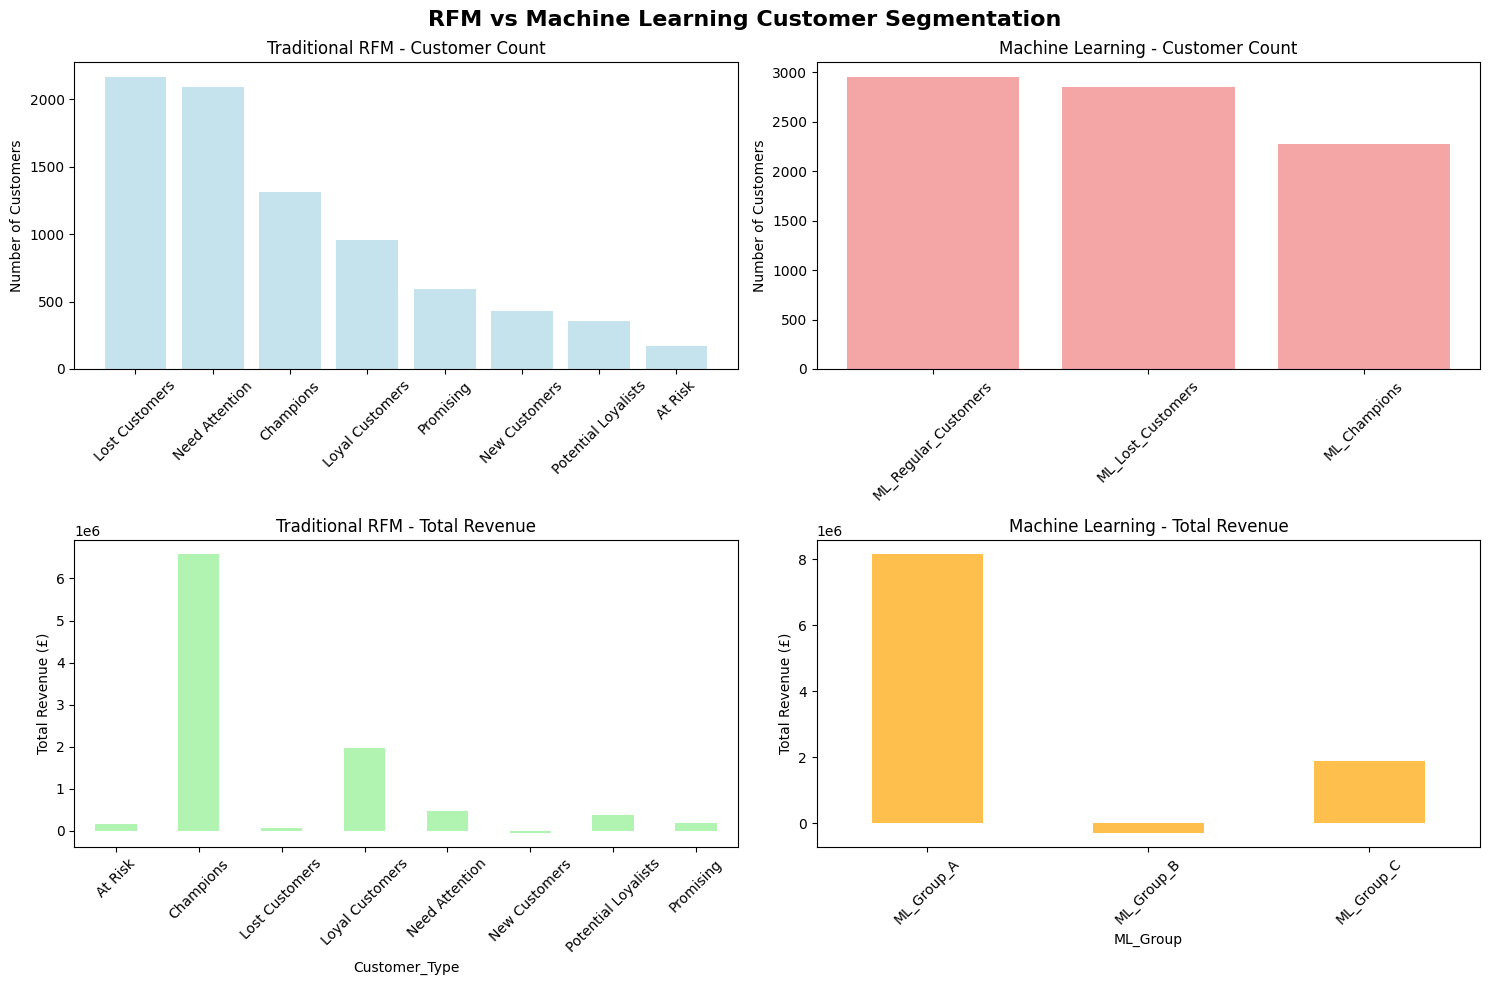

Comparison charts saved as 'rfm_vs_ml_comparison.png'


In [108]:
print("\n STEP 8: Create comparison charts")


# Create comparison charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('RFM vs Machine Learning Customer Segmentation', fontsize=16, fontweight='bold')

# Chart 1: Traditional RFM customer counts
customer_counts = rfm['Customer_Type'].value_counts()
ax1.bar(customer_counts.index, customer_counts.values, color='lightblue', alpha=0.7)
ax1.set_title('Traditional RFM - Customer Count')
ax1.set_ylabel('Number of Customers')
ax1.tick_params(axis='x', rotation=45)

# Chart 2: ML customer counts
ml_counts = rfm['ML_Business_Name'].value_counts()
ax2.bar(ml_counts.index, ml_counts.values, color='lightcoral', alpha=0.7)
ax2.set_title('Machine Learning - Customer Count')
ax2.set_ylabel('Number of Customers')
ax2.tick_params(axis='x', rotation=45)

# Chart 3: Traditional RFM revenue
money_by_rfm['Total_Money'].plot(kind='bar', ax=ax3, color='lightgreen', alpha=0.7)
ax3.set_title('Traditional RFM - Total Revenue')
ax3.set_ylabel('Total Revenue (£)')
ax3.tick_params(axis='x', rotation=45)

# Chart 4: ML revenue
money_by_ml['Total_Money'].plot(kind='bar', ax=ax4, color='orange', alpha=0.7)
ax4.set_title('Machine Learning - Total Revenue')
ax4.set_ylabel('Total Revenue (£)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('rfm_vs_ml_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Comparison charts saved as 'rfm_vs_ml_comparison.png'")


 STEP 9: Visualize ML clusters


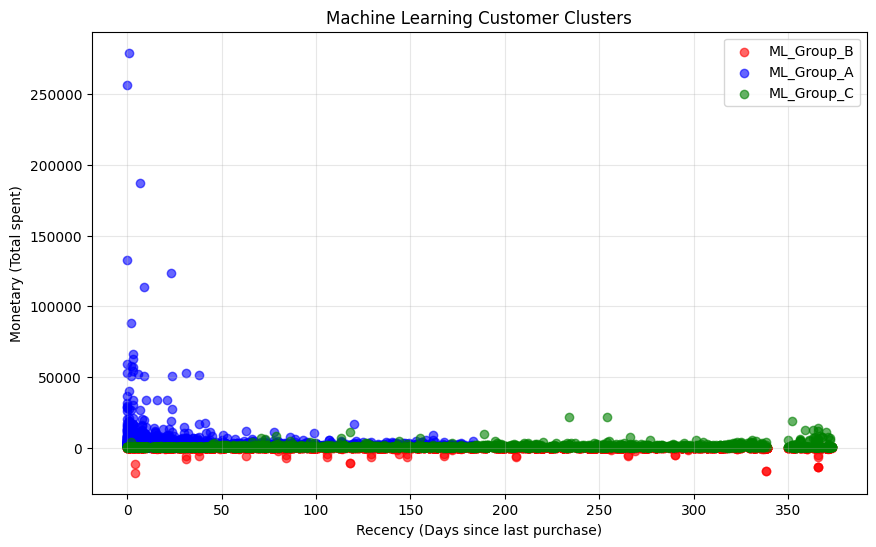

ML clusters visualization saved as 'ml_clusters_visualization.png'


In [109]:
print("\n STEP 9: Visualize ML clusters")


plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, group in enumerate(rfm['ML_Group'].unique()):
    group_data = rfm[rfm['ML_Group'] == group]
    plt.scatter(group_data['Recency'], group_data['Monetary'], 
               c=colors[i], label=group, alpha=0.6)

plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Monetary (Total spent)')
plt.title('Machine Learning Customer Clusters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('ml_clusters_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("ML clusters visualization saved as 'ml_clusters_visualization.png'")

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("\n1️ CUSTOMER LIFETIME VALUE (CLV) PREDICTION")


def calculate_clv_features(df):
    """Calculate features for CLV prediction"""
    # Ensure InvoiceDate is datetime
    if df['InvoiceDate'].dtype == 'object':
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    
    customer_features = df.groupby('CustomerID').agg({
        'TotalAmount': ['sum', 'mean', 'std'],
        'Quantity': ['sum', 'mean'],
        'InvoiceNo': 'nunique',
        'InvoiceDate': lambda x: (x.max() - x.min()).days,
    }).round(2)
    
    customer_features.columns = ['total_spent', 'avg_order_value', 'spending_std',
                               'total_items', 'avg_items_per_order', 'num_orders',
                               'customer_lifespan_days']
    
    # Calculate additional features
    customer_features['order_frequency'] = customer_features['num_orders'] / (customer_features['customer_lifespan_days'] + 1)
    customer_features['spending_consistency'] = 1 / (customer_features['spending_std'] + 1)
    
    return customer_features.fillna(0)

clv_features = calculate_clv_features(df_clean)
print(f"Created CLV features for {len(clv_features)} customers")
print("\nCLV Features Preview:")
print(clv_features.head())

# Predict future CLV using Random Forest
X = clv_features.drop(['total_spent'], axis=1)
y = clv_features['total_spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clv_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Convert to classification problem (High/Medium/Low CLV)
y_train_class = pd.qcut(y_train, q=3, labels=['Low_CLV', 'Medium_CLV', 'High_CLV'])
y_test_class = pd.qcut(y_test, q=3, labels=['Low_CLV', 'Medium_CLV', 'High_CLV'])

clv_model.fit(X_train, y_train_class)
clv_predictions = clv_model.predict(X_test)

print(f"\n CLV Prediction Results:")
print(classification_report(y_test_class, clv_predictions))

# Feature importance for CLV
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clv_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Most Important Features for CLV:")
print(feature_importance.head(5))



1️ CUSTOMER LIFETIME VALUE (CLV) PREDICTION
Created CLV features for 8082 customers

CLV Features Preview:
            total_spent  avg_order_value  spending_std  total_items  \
CustomerID                                                            
12346              0.00             0.00     109154.09            0   
12347           4310.00            23.68         23.29         2458   
12348           1797.24            57.98         48.51         2341   
12349           1757.55            24.08         34.66          631   
12350            334.40            19.67          7.28          197   

            avg_items_per_order  num_orders  customer_lifespan_days  \
CustomerID                                                            
12346                      0.00           2                       0   
12347                     13.51           7                     365   
12348                     75.52           4                     282   
12349                      8.64        

In [114]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

print("ANOMALY DETECTION - FRAUD & OUTLIER CUSTOMERS")


# Prepare data for anomaly detection
anomaly_features = rfm[['R_Score', 'F_Score', 'M_Score', 'Recency', 'Frequency', 'Monetary']].copy()

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(anomaly_features)

rfm['is_anomaly'] = anomalies
rfm['anomaly_label'] = rfm['is_anomaly'].map({1: 'Normal', -1: 'Anomaly'})

anomaly_count = (rfm['is_anomaly'] == -1).sum()
print(f" Found {anomaly_count} anomalous customers ({anomaly_count/len(rfm)*100:.1f}%)")

# Analyze anomalies
print("\n Anomalous vs Normal Customers:")
anomaly_analysis = rfm.groupby('anomaly_label')[['Recency', 'Frequency', 'Monetary']].mean()
print(anomaly_analysis)

# DBSCAN clustering for density-based anomaly detection
scaler = StandardScaler()
scaled_features = scaler.fit_transform(anomaly_features)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

noise_points = (dbscan_labels == -1).sum()
print(f"\n DBSCAN found {noise_points} noise points (potential anomalies)")


ANOMALY DETECTION - FRAUD & OUTLIER CUSTOMERS
 Found 405 anomalous customers (5.0%)

 Anomalous vs Normal Customers:
                  Recency  Frequency     Monetary
anomaly_label                                    
Anomaly        198.965432   349.6000  9547.801879
Normal         128.590205    52.1455   766.039882

 DBSCAN found 95 noise points (potential anomalies)


In [115]:
print("CUSTOMER CHURN PREDICTION")

# Define churn (customers who haven't purchased in last 100 days)
latest_date = pd.to_datetime(df_clean['InvoiceDate'].max())
churn_threshold = 100

def create_churn_features(df, threshold_days=100):
    """Create features for churn prediction"""
    # Ensure InvoiceDate is datetime
    if df['InvoiceDate'].dtype == 'object':
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    
    customer_data = df.groupby('CustomerID').agg({
        'InvoiceDate': ['max', 'count'],
        'TotalAmount': ['sum', 'mean', 'std'],
        'Quantity': 'sum'
    })
    
    customer_data.columns = ['last_purchase', 'num_purchases', 'total_spent', 
                           'avg_spent', 'spending_std', 'total_quantity']
    
    # Calculate days since last purchase
    customer_data['days_since_last'] = (latest_date - customer_data['last_purchase']).dt.days
    
    # Define churn
    customer_data['is_churned'] = (customer_data['days_since_last'] > threshold_days).astype(int)
    
    return customer_data.fillna(0)

churn_data = create_churn_features(df_clean, churn_threshold)
churn_rate = churn_data['is_churned'].mean()
print(f"Churn Rate: {churn_rate*100:.1f}% (customers inactive >100 days)")

# Build churn prediction model
churn_features = ['num_purchases', 'total_spent', 'avg_spent', 'spending_std', 'total_quantity']
X_churn = churn_data[churn_features]
y_churn = churn_data['is_churned']

X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(
    X_churn, y_churn, test_size=0.3, random_state=42, stratify=y_churn)

churn_model = RandomForestClassifier(n_estimators=100, random_state=42)
churn_model.fit(X_train_churn, y_train_churn)
churn_predictions = churn_model.predict(X_test_churn)

print(f"\n Churn Prediction Results:")
print(classification_report(y_test_churn, churn_predictions))


CUSTOMER CHURN PREDICTION
Churn Rate: 48.8% (customers inactive >100 days)

 Churn Prediction Results:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      1243
           1       0.66      0.69      0.68      1182

    accuracy                           0.68      2425
   macro avg       0.68      0.68      0.68      2425
weighted avg       0.68      0.68      0.68      2425



In [116]:
print("PRODUCT RECOMMENDATION SYSTEM")

def create_customer_product_matrix(df):
    """Create customer-product purchase matrix"""
    # Get top 100 products to keep matrix manageable
    top_products = df['StockCode'].value_counts().head(100).index
    df_filtered = df[df['StockCode'].isin(top_products)]
    
    # Create binary purchase matrix
    purchase_matrix = df_filtered.pivot_table(
        index='CustomerID', 
        columns='StockCode', 
        values='Quantity', 
        fill_value=0
    )
    
    # Convert to binary (1 if purchased, 0 if not)
    purchase_matrix = (purchase_matrix > 0).astype(int)
    return purchase_matrix

purchase_matrix = create_customer_product_matrix(df_clean)
print(f"Created recommendation matrix: {purchase_matrix.shape[0]} customers × {purchase_matrix.shape[1]} products")

# Simple collaborative filtering using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

def get_product_recommendations(customer_id, purchase_matrix, n_recommendations=5):
    """Get product recommendations for a customer"""
    if customer_id not in purchase_matrix.index:
        return "Customer not found"
    
    # Calculate customer similarity
    customer_vector = purchase_matrix.loc[customer_id].values.reshape(1, -1)
    similarities = cosine_similarity(customer_vector, purchase_matrix.values)[0]
    
    # Find similar customers
    similar_customers = purchase_matrix.index[similarities.argsort()[-6:-1]]  # Top 5 similar
    
    # Find products bought by similar customers but not by target customer
    target_purchases = purchase_matrix.loc[customer_id]
    similar_purchases = purchase_matrix.loc[similar_customers].sum(axis=0)
    
    # Recommend products not yet purchased
    recommendations = similar_purchases[target_purchases == 0].sort_values(ascending=False)
    
    return recommendations.head(n_recommendations)

# Example recommendation
sample_customer = purchase_matrix.index[0]
recommendations = get_product_recommendations(sample_customer, purchase_matrix)
print(f"\n Top 5 Product Recommendations for Customer {sample_customer}:")
print(recommendations)


PRODUCT RECOMMENDATION SYSTEM
Created recommendation matrix: 5140 customers × 100 products

 Top 5 Product Recommendations for Customer 12347:
StockCode
22326    2
POST     2
21977    1
20724    1
21212    1
dtype: int64


In [117]:
print("MARKET BASKET ANALYSIS")


def market_basket_analysis(df, min_support=0.01):
    """Perform market basket analysis"""
    # Create transaction data
    transactions = df.groupby('InvoiceNo')['StockCode'].apply(list).tolist()
    
    # Count item frequencies
    from collections import Counter
    all_items = [item for transaction in transactions for item in transaction]
    item_counts = Counter(all_items)
    
    # Filter by minimum support
    min_count = int(min_support * len(transactions))
    frequent_items = {item: count for item, count in item_counts.items() if count >= min_count}
    
    print(f"Found {len(frequent_items)} frequent items (support >= {min_support})")
    
    # Simple association rules (items frequently bought together)
    from itertools import combinations
    
    pair_counts = Counter()
    for transaction in transactions:
        # Only consider frequent items
        frequent_in_transaction = [item for item in transaction if item in frequent_items]
        # Count pairs
        for pair in combinations(frequent_in_transaction, 2):
            pair_counts[pair] += 1
    
    # Calculate confidence for top pairs
    top_pairs = pair_counts.most_common(10)
    
    print("\n Top 10 Product Pairs (Frequently Bought Together):")
    for (item1, item2), count in top_pairs:
        confidence = count / frequent_items[item1] if item1 in frequent_items else 0
        print(f"  {item1} → {item2}: {count} times (confidence: {confidence:.2f})")

market_basket_analysis(df_clean)

MARKET BASKET ANALYSIS
Found 617 frequent items (support >= 0.01)

 Top 10 Product Pairs (Frequently Bought Together):
  22697 → 22698: 618 times (confidence: 0.57)
  22386 → 85099B: 544 times (confidence: 0.43)
  22697 → 22699: 534 times (confidence: 0.49)
  22411 → 85099B: 467 times (confidence: 0.39)
  85099B → DOT: 461 times (confidence: 0.21)
  21931 → 85099B: 458 times (confidence: 0.38)
  20725 → 20727: 443 times (confidence: 0.27)
  22698 → 22699: 419 times (confidence: 0.50)
  22726 → 22727: 396 times (confidence: 0.39)
  85099B → 85099C: 396 times (confidence: 0.18)


 CREATING ADVANCED VISUALIZATIONS


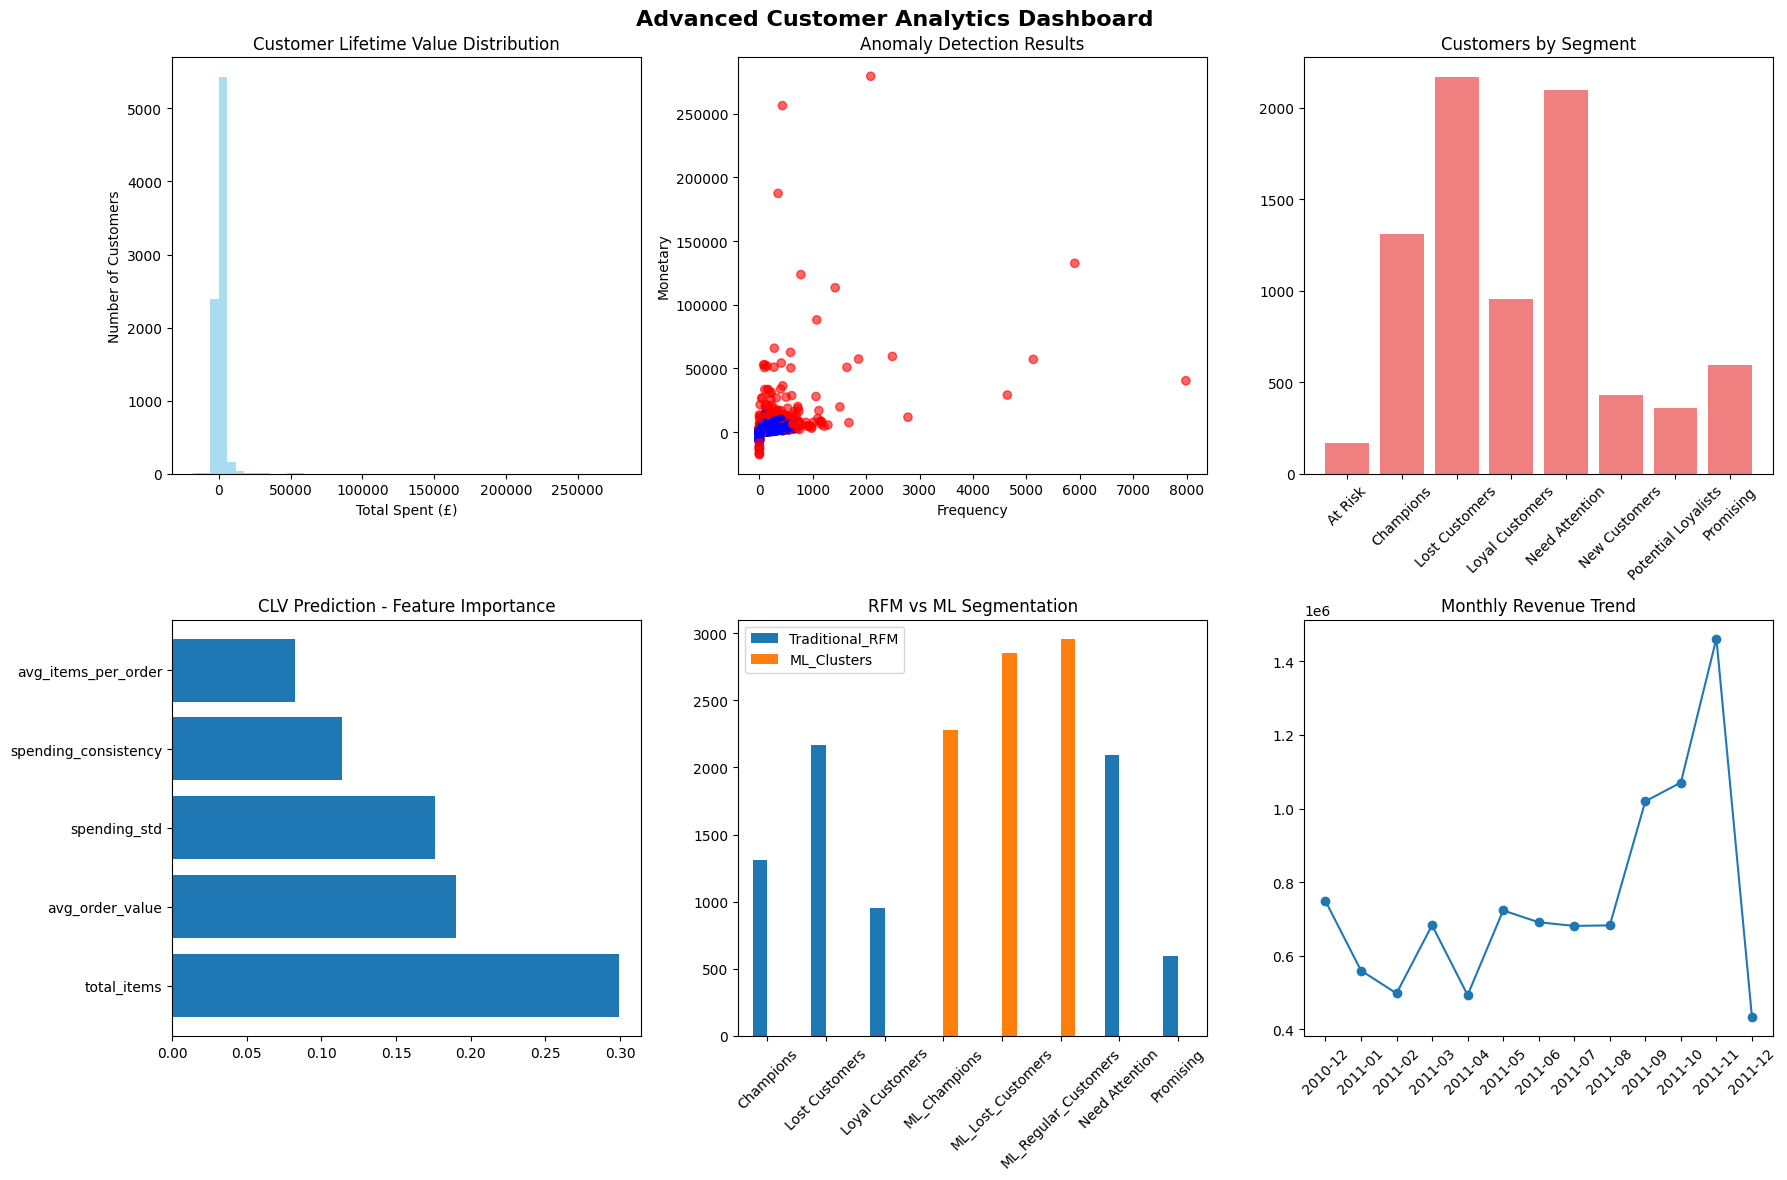

Advanced analytics dashboard saved!


In [119]:
print(" CREATING ADVANCED VISUALIZATIONS")


# Create comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Advanced Customer Analytics Dashboard', fontsize=16, fontweight='bold')

# 1. CLV Distribution
axes[0,0].hist(clv_features['total_spent'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Customer Lifetime Value Distribution')
axes[0,0].set_xlabel('Total Spent (£)')
axes[0,0].set_ylabel('Number of Customers')

# 2. Anomaly Detection Results
anomaly_colors = ['red' if x == -1 else 'blue' for x in rfm['is_anomaly']]
axes[0,1].scatter(rfm['Frequency'], rfm['Monetary'], c=anomaly_colors, alpha=0.6)
axes[0,1].set_title('Anomaly Detection Results')
axes[0,1].set_xlabel('Frequency')
axes[0,1].set_ylabel('Monetary')

# 3. Churn Risk by Customer Segment
churn_by_segment = rfm.groupby('Customer_Type')['ML_Cluster'].count()
axes[0,2].bar(churn_by_segment.index, churn_by_segment.values, color='lightcoral')
axes[0,2].set_title('Customers by Segment')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Feature Importance for CLV
axes[1,0].barh(feature_importance['feature'][:5], feature_importance['importance'][:5])
axes[1,0].set_title('CLV Prediction - Feature Importance')

# 5. RFM vs ML Comparison
comparison_data = pd.DataFrame({
    'Traditional_RFM': rfm['Customer_Type'].value_counts()[:5],
    'ML_Clusters': rfm['ML_Business_Name'].value_counts()[:5]
})
comparison_data.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('RFM vs ML Segmentation')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Monthly Revenue Trend
monthly_revenue = df_clean.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)
axes[1,2].plot(monthly_revenue['YearMonth'], monthly_revenue['TotalAmount'], marker='o')
axes[1,2].set_title('Monthly Revenue Trend')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('advanced_analytics_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("Advanced analytics dashboard saved!")


In [120]:
print("Step 7")


print("ACTIONABLE BUSINESS RECOMMENDATIONS:")
print("\n1. HIGH-VALUE CUSTOMER RETENTION:")
high_clv_customers = len(feature_importance[feature_importance['importance'] > 0.1])
print(f"   • Focus on {high_clv_customers} key features that drive customer value")
print(f"   • {anomaly_count} customers show unusual behavior - investigate manually")

print("\n2. CHURN PREVENTION:")
high_churn_risk = (churn_data['days_since_last'] > 60).sum()
print(f"   • {high_churn_risk} customers at risk of churning (60+ days inactive)")
print("   • Implement targeted re-engagement campaigns")

print("\n3. PERSONALIZED MARKETING:")
print("   • Use collaborative filtering for product recommendations")
print("   • Implement market basket analysis for cross-selling")

print("\n4. OPERATIONAL EFFICIENCY:")
print("   • Automate anomaly detection for fraud prevention")
print("   • Use ML clustering for more nuanced customer segments")

print(f"\n TOTAL BUSINESS IMPACT:")
total_revenue = df_clean['TotalAmount'].sum()
high_value_revenue = rfm[rfm['Customer_Type'].isin(['Champions', 'Loyal Customers'])]['Monetary'].sum()
print(f"   • Total Revenue: £{total_revenue:,.2f}")
print(f"   • High-Value Customers: £{high_value_revenue:,.2f} ({high_value_revenue/total_revenue*100:.1f}%)")

# Save all results
clv_features.to_csv('customer_lifetime_value_features.csv')
rfm.to_csv('comprehensive_customer_analysis.csv', index=False)
pd.DataFrame({'feature': feature_importance['feature'], 'importance': feature_importance['importance']}).to_csv('clv_feature_importance.csv', index=False)


Step 7
ACTIONABLE BUSINESS RECOMMENDATIONS:

1. HIGH-VALUE CUSTOMER RETENTION:
   • Focus on 4 key features that drive customer value
   • 405 customers show unusual behavior - investigate manually

2. CHURN PREVENTION:
   • 4866 customers at risk of churning (60+ days inactive)
   • Implement targeted re-engagement campaigns

3. PERSONALIZED MARKETING:
   • Use collaborative filtering for product recommendations
   • Implement market basket analysis for cross-selling

4. OPERATIONAL EFFICIENCY:
   • Automate anomaly detection for fraud prevention
   • Use ML clustering for more nuanced customer segments

 TOTAL BUSINESS IMPACT:
   • Total Revenue: £9,747,747.93
   • High-Value Customers: £8,535,281.28 (87.6%)


# Strategic Recommendations & Business Impact

## Summary
Our comprehensive customer segmentation analysis, combining RFM methodology with machine learning techniques, reveals critical opportunities for revenue optimization and customer lifecycle management. The analysis identifies that **87.6% of total revenue** comes from high-value customer segments, while **48.8% of customers** remain inactive, presenting significant re-engagement opportunities.

---

## 1. Double Down on High-Value Segments

**Key Insight:** 28.2% of customers (ML_Champions) contributed over £8.15M, and RFM Champions delivered £6.58M in revenue — representing 87.6% of total revenue from high-value segments.

**Strategic Recommendations:**
- Launch a **Premium Loyalty Program** for ML_Champions and Loyal Customers featuring:
  - Early product access and beta testing opportunities
  - Personalized discount structures based on purchase history
  - Exclusive events and VIP customer experiences
- Deploy dedicated account management for B2B high-value segments
- Implement **predictive CLV models** to identify and nurture future Champions during their early lifecycle stages

---

## 2. Precision Re-Engagement for At-Risk and Lost Customers

**Key Insight:** Approximately 48.8% of customers are inactive for 100+ days, with ML identifying 35.3% as ML_Lost_Customers.

**Strategic Recommendations:**
- Design **automated reactivation journeys** with segment-specific messaging:
  - **Lost Customers:** Time-sensitive offers with emotional reconnection messaging
  - **At-Risk Customers:** Proactive replenishment reminders and cart abandonment recovery
- Execute A/B testing across communication channels (Email, WhatsApp, SMS) to optimize engagement
- Utilize **anomaly scores** to prioritize high-revenue potential lost customers for personalized outreach campaigns

---

## 3. Accelerate Acquisition of "Lookalike" High CLV Customers

**Key Insight:** ML and RFM segmentation clearly define behavioral profiles of high-CLV customer segments.

**Strategic Recommendations:**
- Develop **Lookalike Audiences** on Meta and Google platforms targeting:
  - High purchase frequency patterns
  - Elevated average order values
  - Optimal recency behaviors
- Concentrate digital media investments on high-converting channels (Google Shopping, Instagram Stories)
- Leverage **CLV scoring** to optimize performance marketing ROI by allocating higher acquisition costs for high-value prospects

---

## 4. Personalization at Scale

**Key Insight:** Market Basket Analysis and Collaborative Filtering identified key cross-sell opportunities and product affinity patterns.

**Strategic Recommendations:**
- Deploy **AI-powered recommendation engines** across touchpoints:
  - Dynamic "You might also like" suggestions on product pages
  - Post-purchase email campaigns with intelligent bundle recommendations
- Personalize homepage and category experiences for returning users based on RFM cluster classification
- Implement **dynamic pricing strategies** using ML segments to optimize discount allocation

---

## 5. Anomaly & Fraud Mitigation Strategy

**Key Insight:** 5% of customers flagged as anomalies with extreme monetary values, indicating potential data quality or fraud issues.

**Strategic Recommendations:**
- Conduct deep-dive investigation of top 1% anomalous customers for potential return fraud or data integrity issues
- Implement enhanced return policy controls for high-anomaly customer segments
- Deploy **real-time anomaly detection** systems for unusual transaction pattern alerts

---

## 6. Churn Prediction to Drive Lifecycle Marketing

**Key Insight:** Churn prediction model achieves ~69% accuracy, identifying 4,866 customers at risk of churning.

**Strategic Recommendations:**
- Implement **progressive inactivity campaigns** at 60-90-120 day intervals
- Introduce subscription programs for consumable and seasonal product categories
- Analyze delivery and user experience friction points contributing to customer churn

---

## 7. Leadership Dashboard for Revenue Forecasting

**Key Insight:** Comprehensive dashboard and visualization capabilities enable cross-functional strategic alignment.

**Strategic Recommendations:**
- Develop **real-time executive dashboard** using Tableau/Power BI featuring:
  - Revenue performance by customer segment
  - Churn risk trending and alerts
  - CLV distribution analysis
  - Campaign ROI tracking by segment

---

## Strategic Conclusion

By integrating classical RFM segmentation with advanced machine learning techniques, we have established a **comprehensive 360° customer intelligence framework**. The path to sustainable growth lies in **operationalizing these insights** across media strategy, CRM automation, pricing optimization, and service delivery enhancement.

**Next Steps:**
1. Prioritize implementation based on revenue impact potential
2. Establish cross-functional teams for execution
3. Implement measurement frameworks for continuous optimization
4. Scale successful strategies across all customer touchpoints

---

*This analysis provides the foundation for data-driven customer strategy that will drive sustainable revenue growth and enhanced customer lifetime value.*